# Boeing Assignment 

### Applicant: Rodolfo Lerma

### Problem Statement:

Included in the training dataset is information on used cars previously sold. Each row corresponds to one used car listing. The first column of the data contains a unique identifier for the listing. The next twenty-six columns contain information on parameters relevant to the transaction, with those parameters described in more detail in the appendix attached. Finally, the last two columns of the `“Training_dataset.csv”` contain information on `“Vehicle_Trim”` and `“Dealer_Listing_Price”`, which describe the trim of the vehicle involved in the sale, and the price at which the vehicle was listed by the dealer.
Your challenge is to build one or more models, through whatever means you find most appropriate, capable of predicting **vehicle trim** and **dealer listing price** given the other twenty six variables provided.

**Instructions:**

- Model the problem using whatever means you consider best. Your work is expected to be entirely your own. You may consult any resource or reference of your choosing to aide in solving the problem, but the work must be entirely yours. Please reference any resources you use in the write-up covered in step 5.


- If you use a software package to assist you, please include ALL of your original source code in its entirety, and submit it to us EXACTLY following the instructions in Steps 5 and 6. Please also include information about which package you used and why in your brief problem write-up.


- Do not use or add data from any third-party sources, such as internet car estimating tools, to the data provided. At your discretion, some or all of the provided data in `“Training_dataset.csv”` may be used, omitted or manipulated in any way during modeling, but no additional data may be added from outside sources.


- Once your model is built, use it to make predictions on EACH of the 1,000 vehicle listings included in the `“Test_dataset.csv”` file. Your output should be a comma separated values (.csv) file with one-thousand rows and three columns. The first column should be the `unique identifier` for the listing. The second column should be your predicted value for `vehicle trim`. The third column should be your predicted value for `dealer listing price`.


- Please submit a brief write-up of no more than 500 words describing the approach you selected and why. Please save your response as a PDF if possible. Please copy any source code from Step 2 and paste it as text into an appendix at the end of your write-up.


- Return your submission to us by replying back to the original email before the date and time specified in that email. Please attach the CSV containing your predictions from Step 4 and the PDF containing your write-up and source code from step 5 to the email. It should contain ONLY two attachments: the CSV from step 4 and the PDF from Step 5. Please don’t resubmit any of our original data back in your reply.

## TO DO LIST:
- Continue looking for processes that can be converted to functions
- Al mismo tiempo que voy modificando el training data set modificar el testing data set

## Abstract:

The analysis is structured in the following way:


## Data Exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

Test_df = pd.read_csv('Test_Dataset.csv')
Training_df = pd.read_csv('Training_Dataset.csv')

In [2]:
Training_df.head(3)

,ListingID,SellerCity,SellerIsPriv,SellerListSrc,SellerName,SellerRating,SellerRevCnt,SellerState,SellerZip,VehBodystyle,...,VehMake,VehMileage,VehModel,VehPriceLabel,VehSellerNotes,VehType,VehTransmission,VehYear,Vehicle_Trim,Dealer_Listing_Price
0,3287,Warren,False,Inventory Command Center,Prime Motorz,5.0,32,MI,48091.0,SUV,...,Jeep,39319.0,Grand Cherokee,Fair Price,NaN,Used,Automatic 8-Speed,2015,High Altitude,30990.0
1,3920,Fargo,False,Cadillac Certified Program,Gateway Chevrolet Cadillac,4.8,1456,ND,58103.0,SUV,...,Cadillac,30352.0,XT5,Good Deal,Come take a look at our great pre-owned invent...,Used,NaN,2017,NaN,34860.0
2,4777,Waukesha,False,Jeep Certified Program,Wilde Chrysler Jeep Dodge Ram &amp; Subaru,4.8,1405,WI,53186.0,SUV,...,Jeep,38957.0,Grand Cherokee,Good Deal,Backed by a rigorous 125-point inspection by f...,Used,8-Speed Automatic w/OD,2015,Laredo,23249.0


In [3]:
Training_df.shape

(6298, 29)

It is possible to see that the Training Data Set contains 29 columns and 6298 data points. Out of those 29 columns, 2 are the **target** variables.

In [4]:
Test_df.head(3)

,ListingID,SellerCity,SellerIsPriv,SellerListSrc,SellerName,SellerRating,SellerRevCnt,SellerState,SellerZip,VehBodystyle,...,VehHistory,VehListdays,VehMake,VehMileage,VehModel,VehPriceLabel,VehSellerNotes,VehType,VehTransmission,VehYear
0,8622015,Seneca,False,HomeNet Automotive,Lake Keowee Chrysler Dodge Jeep Ram,2.5,59,SC,29678,SUV,...,"1 Owner, Non-Personal Use Reported, Buyback Pr...",143.991262,Cadillac,13625.0,XT5,Good Deal,Thank you for visiting another one of Lake Keo...,Used,8-Speed Automatic,2018
1,8625693,Bedford,False,Inventory Command Center,North Coast Auto Mall,4.7,2116,OH,44146,SUV,...,"1 Owner, Accident(s) Reported, Non-Personal Us...",138.770486,Jeep,42553.0,Grand Cherokee,Good Deal,This 2017 Jeep Grand Cherokee 4dr Limited 4x4 ...,Used,8-Speed Automatic,2017
2,8625750,Webster,False,Jeep Certified Program,Marina Chrysler Dodge Jeep Mitsubishi RAM,3.9,46,NY,14580,SUV,...,"1 Owner, Buyback Protection Eligible",31.951088,Jeep,48951.0,Grand Cherokee,Good Deal,Certified. Brilliant Black Crystal Pearlcoat 2...,Used,8-Speed Automatic,2015


In [5]:
Test_df.shape

(1000, 27)

It is possible to see that the Training Dataset contains 27 columns and 1000 data points, this since the 2 **target** variables were removed from the dataset.

In [6]:
Training_df.dtypes

ListingID                 int64
SellerCity               object
SellerIsPriv               bool
SellerListSrc            object
SellerName               object
SellerRating            float64
SellerRevCnt              int64
SellerState              object
SellerZip               float64
VehBodystyle             object
VehCertified               bool
VehColorExt              object
VehColorInt              object
VehDriveTrain            object
VehEngine                object
VehFeats                 object
VehFuel                  object
VehHistory               object
VehListdays             float64
VehMake                  object
VehMileage              float64
VehModel                 object
VehPriceLabel            object
VehSellerNotes           object
VehType                  object
VehTransmission          object
VehYear                   int64
Vehicle_Trim             object
Dealer_Listing_Price    float64
dtype: object

Looking at the data, the type distribution is as follows:
- 8 Numerical Variables (6 `float64` & 2 `int64`)
- 2 Boolean Variables (`bool`)
- 19 Categorical Variables (`object`)

### Distribution of the Target Variable

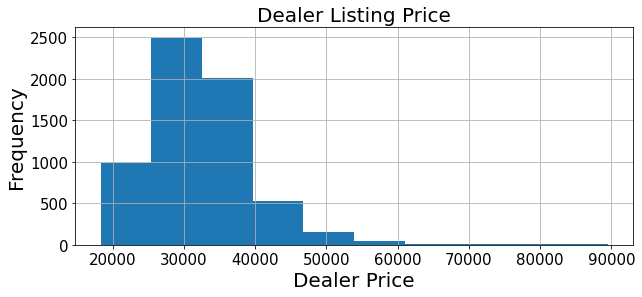

In [7]:
import matplotlib.pyplot as plt
Training_df['Dealer_Listing_Price'].hist(figsize = (10,4))
plt.xlabel('Dealer Price', fontsize = 20)
plt.ylabel('Frequency',fontsize = 20)
plt.title('Dealer Listing Price', fontsize = 20)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.grid(True)
plt.show()

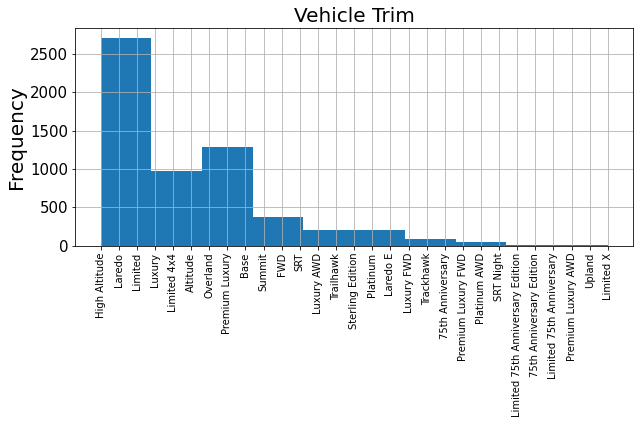

In [8]:
Training_df['Vehicle_Trim'].hist(figsize = (10,4))
#plt.xlabel('Trim', fontsize = 20)
plt.ylabel('Frequency',fontsize = 20)
plt.title('Vehicle Trim', fontsize = 20)
plt.tick_params(axis="x", labelsize=10, rotation=90)
plt.tick_params(axis="y", labelsize=15)
plt.grid(True)
plt.show()

###  Distribution of Numerical Variables

In [9]:
numeric_columns = ['SellerRating', 'SellerRevCnt', 'VehListdays', 'VehMileage', 'VehYear']

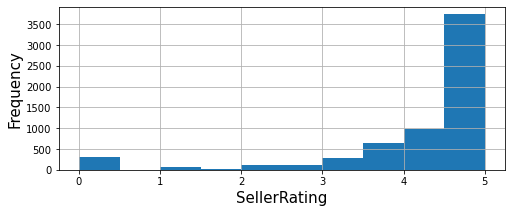

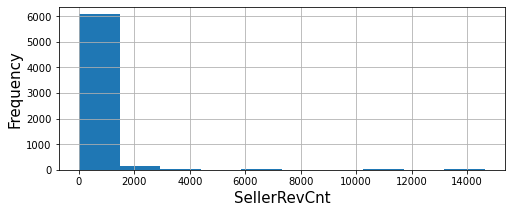

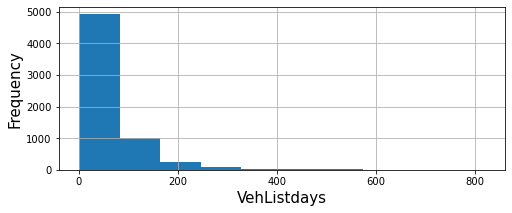

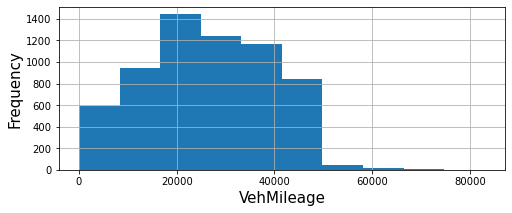

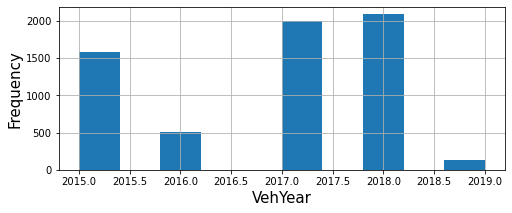

In [10]:
import matplotlib.pyplot as plt

def hist_plot(df,a):
    df[a].hist(figsize = (8,3))
    plt.xlabel(a, fontsize = 15)
    plt.ylabel('Frequency',fontsize = 15)
    plt.tick_params(axis="x", labelsize=10)
    plt.tick_params(axis="y", labelsize=10)
    plt.grid(True)
    plt.show()
    
for i in numeric_columns:
    hist_plot(Training_df, i)

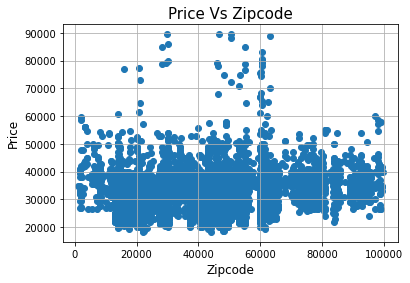

In [11]:
plt.scatter(Training_df['SellerZip'], Training_df['Dealer_Listing_Price'])
plt.title('Price Vs Zipcode', fontsize = 15)
plt.xlabel('Zipcode', fontsize = 12)
plt.ylabel('Price', fontsize = 12)
plt.grid()
plt.show()

It seems zipcode does not provide a clear difference in reference to the `Price` target variable.

## Data Formatting

### Missing Values

In [12]:
columns = Training_df.columns.to_list()

missing_values = []
my_list = Training_df.columns.values.tolist()
y = Training_df.shape
for i in my_list:
    x = Training_df[i].isnull().sum()
    missing_values.append(x)
    
columns_missing = dict(zip(my_list, missing_values))
a = sorted(columns_missing.items(), key=lambda x: x[1], reverse = True)  

missing_columns_names = []
for key, value in columns_missing.items():
    if value > 196: 
        x = key
        missing_columns_names.append(x)

In [13]:
print(columns_missing)

{'ListingID': 0, 'SellerCity': 0, 'SellerIsPriv': 0, 'SellerListSrc': 2, 'SellerName': 0, 'SellerRating': 0, 'SellerRevCnt': 0, 'SellerState': 0, 'SellerZip': 2, 'VehBodystyle': 0, 'VehCertified': 0, 'VehColorExt': 73, 'VehColorInt': 728, 'VehDriveTrain': 401, 'VehEngine': 361, 'VehFeats': 275, 'VehFuel': 2, 'VehHistory': 201, 'VehListdays': 2, 'VehMake': 0, 'VehMileage': 2, 'VehModel': 0, 'VehPriceLabel': 285, 'VehSellerNotes': 243, 'VehType': 0, 'VehTransmission': 197, 'VehYear': 0, 'Vehicle_Trim': 405, 'Dealer_Listing_Price': 52}


Looking at the data we can see that there are some columns with more than 10% (`VehColorInt`) of missing data points.

In [14]:
print('Columns with missing values greater than 200: ')
print(missing_columns_names)

Columns with missing values greater than 200: 
['VehColorInt', 'VehDriveTrain', 'VehEngine', 'VehFeats', 'VehHistory', 'VehPriceLabel', 'VehSellerNotes', 'VehTransmission', 'Vehicle_Trim']


For numerical features with missing values 

In [15]:
data = Training_df.copy()
data.dropna(inplace = True)
data.shape

(5045, 29)

In [16]:
data = data.reset_index()

If the missing data is drop we reduce the data set by 20%. This is a possibility.

### Removing Columns from dataset

Based on the nature of the data some columns will be removed as they do not add to the prediction:
- `ListingID`
- `VehSellerNotes`
- `SellerZip`

In [17]:
data.drop(columns=['ListingID', 'VehSellerNotes', 'SellerZip', 'index'], inplace = True)
columns_updated = data.columns.to_list()

### Formatting Boolean Variables

In [18]:
boolean_columns = ['SellerIsPriv', 'VehCertified']
def boolean_format(columns, df):
    for i in columns:
        df[i] = df[i].astype(int)
        
boolean_format(boolean_columns, data)

In [19]:
data

,SellerCity,SellerIsPriv,SellerListSrc,SellerName,SellerRating,SellerRevCnt,SellerState,VehBodystyle,VehCertified,VehColorExt,...,VehListdays,VehMake,VehMileage,VehModel,VehPriceLabel,VehType,VehTransmission,VehYear,Vehicle_Trim,Dealer_Listing_Price
0,Waukesha,0,Jeep Certified Program,Wilde Chrysler Jeep Dodge Ram &amp; Subaru,4.8,1405,WI,SUV,1,Brilliant Black Crystal Pearlcoat,...,28.107014,Jeep,38957.0,Grand Cherokee,Good Deal,Used,8-Speed Automatic w/OD,2015,Laredo,23249.0
1,Wentzville,0,Inventory Command Center,Century Dodge Chrysler Jeep RAM,4.4,21,MO,SUV,0,Diamond Black Crystal Pearlcoat,...,59.816875,Jeep,20404.0,Grand Cherokee,Good Deal,Used,Automatic,2018,Limited,31977.0
2,Fayetteville,0,HomeNet Automotive,Superior Buick GMC of Fayetteville,3.7,74,AR,SUV,0,Radiant Silver Metallic,...,98.665301,Cadillac,19788.0,XT5,Good Deal,Used,8-Speed Automatic,2018,Luxury,33495.0
3,Olean,0,Digital Motorworks (DMi),Paul Brown Chrysler Dodge Jeep RAM Kia,3.0,51,NY,SUV,0,Billet Silver Metallic Clearcoat,...,30.967500,Jeep,34649.0,Grand Cherokee,Good Deal,Used,8-Speed Automatic,2018,Limited,27900.0
4,Ottawa,0,Digital Motorworks (DMi),Sierra Motor Mall,3.5,17,IL,SUV,0,True Blue Pearlcoat,...,194.482338,Jeep,48814.0,Grand Cherokee,Good Deal,Used,8-Speed Automatic,2017,Laredo,22989.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5040,Columbus,0,Digital Motorworks (DMi),CarMax Columbus Sawmill,1.5,6,OH,SUV,0,Black,...,39.484641,Jeep,35773.0,Grand Cherokee,Good Deal,Used,8-Speed Automatic,2015,Limited,25998.0
5041,Indianapolis,0,Digital Motorworks (DMi),CarMax Indianapolis,3.3,16,IN,SUV,0,Gray,...,4.840069,Jeep,20039.0,Grand Cherokee,Fair Price,Used,8-Speed Automatic,2015,Limited,31998.0
5042,Dublin,0,Digital Motorworks (DMi),Cadillac of Dublin,4.1,20,OH,SUV,1,Black,...,184.921991,Cadillac,16278.0,XT5,Good Deal,Used,8-Speed Automatic,2018,Luxury,35674.0
5043,Sandusky,0,Digital Motorworks (DMi),Foster Chevrolet Cadillac,4.9,278,OH,SUV,0,Black,...,73.868426,Cadillac,38146.0,XT5,Great Deal,Used,8-Speed Automatic,2017,Luxury,31995.0


### Normalizing Numerical Variables

In [20]:
def normalization_format(numeric_columns, df):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(df[numeric_columns])
    data_scaled = scaler.transform(df[numeric_columns])
    df1 = pd.DataFrame(data_scaled, columns = numeric_columns)
    return df1

data_norm = normalization_format(numeric_columns, data)
data.drop(columns = numeric_columns, inplace = True)
data = data.join(data_norm)

In [21]:
special_columns = ['VehHistory', 'VehFeats']
targets = ["Vehicle_Trim", "Dealer_Listing_Price"]

In [22]:
def categorical_format(column, df):
    df[column] = df[column].astype('category')
    df["Vehicle_Trim_cat"] = df[column].cat.codes
    df.drop(columns = column, inplace = True)
    
categorical_format('Vehicle_Trim', data)

In [23]:
categorical_columns = [i for i in columns_updated if i not in numeric_columns]
categorical_columns = [i for i in categorical_columns if i not in boolean_columns]
categorical_columns = [i for i in categorical_columns if i not in special_columns]
categorical_columns = [i for i in categorical_columns if i not in targets]

In [24]:
for i in categorical_columns:
    data[i] = data[i].str.lower()

### One Hot Encoding For Categorical Columns

In [25]:
data.head()

,SellerCity,SellerIsPriv,SellerListSrc,SellerName,SellerState,VehBodystyle,VehCertified,VehColorExt,VehColorInt,VehDriveTrain,...,VehPriceLabel,VehType,VehTransmission,Dealer_Listing_Price,SellerRating,SellerRevCnt,VehListdays,VehMileage,VehYear,Vehicle_Trim_cat
0,waukesha,0,jeep certified program,wilde chrysler jeep dodge ram &amp; subaru,wi,suv,1,brilliant black crystal pearlcoat,black,4x4/4wd,...,good deal,used,8-speed automatic w/od,23249.0,0.557466,0.713329,-0.432058,0.952975,-1.480290,6
1,wentzville,0,inventory command center,century dodge chrysler jeep ram,mo,suv,0,diamond black crystal pearlcoat,black,4wd,...,good deal,used,automatic,31977.0,0.189746,-0.334786,0.037547,-0.472175,0.999147,8
2,fayetteville,0,homenet automotive,superior buick gmc of fayetteville,ar,suv,0,radiant silver metallic,cirrus,fwd,...,good deal,used,8-speed automatic,33495.0,-0.453764,-0.294649,0.612870,-0.519493,0.999147,10
3,olean,0,digital motorworks (dmi),paul brown chrysler dodge jeep ram kia,ny,suv,0,billet silver metallic clearcoat,black,4wd,...,good deal,used,8-speed automatic,27900.0,-1.097274,-0.312067,-0.389696,0.622055,0.999147,8
4,ottawa,0,digital motorworks (dmi),sierra motor mall,il,suv,0,true blue pearlcoat,black,4wd,...,good deal,used,8-speed automatic,22989.0,-0.637624,-0.337815,2.031867,1.710140,0.172668,6


In [26]:
def hot_encoding(data, categorical_columns):
    one_hot = pd.get_dummies(data[categorical_columns])
    return one_hot

one_hot = hot_encoding(data, categorical_columns)
data = data.join(one_hot)
data.drop(columns = categorical_columns, inplace = True)

### Formatting of two *List of Lists* Columns  (`VehHistory` & `VehFeats`)

There are 2 columns with a list of values that might be important for the analysis. For this reason they are going to be split and included as features (One Hot Encoding):
- `VehHistory`
- `VehFeats`

### `VehFeats`

In [27]:
def veh_features(data):
    x = pd.Series(data['VehFeats'])
    split_df = data['VehFeats'].tolist()
    mySeries = pd.Series(split_df) 
    x = mySeries[2][1:-1]
    letter_list = x.split(",")

    list_of_lists = []
    for i in range(len(mySeries)):
        x = mySeries[i][1:-1]
        new_string = x.replace(" '", "")
        new_string = new_string.replace("'", "")
        new_string = new_string.replace(",", "_")
        new_string = new_string.replace(";", "_")
        new_string = new_string.lower()
        letter_list = new_string.split("_")
        list_of_lists.append(letter_list)

    from sklearn.preprocessing import MultiLabelBinarizer
    
    test = pd.Series(list_of_lists)
    mlb = MultiLabelBinarizer()
    onehot_VehFeats = pd.DataFrame(mlb.fit_transform(test),
                       columns=mlb.classes_,
                       index=test.index)
    return onehot_VehFeats

onehot_VehFeats = veh_features(data)
data = data.join(onehot_VehFeats)
data.drop(columns = 'VehFeats', inplace = True)

### `VehHistory`

In [28]:
def veh_history(data):
    split_df2 = data['VehHistory'].tolist()
    mySeries2 = pd.Series(split_df2) 

    list_of_lists2 = []
    for i in range(len(mySeries2)):
        w = mySeries2[i]
        letter_list2 = w.split(",")
        list_of_lists2.append(letter_list2)
        
    from sklearn.preprocessing import MultiLabelBinarizer
    
    test2 = pd.Series(list_of_lists2)
    mlb2 = MultiLabelBinarizer()
    onehot_VehHistory = pd.DataFrame(mlb2.fit_transform(test2),
                       columns=mlb2.classes_,
                       index=test2.index)
    return onehot_VehHistory

onehot_VehHistory = veh_history(data)
data = data.join(onehot_VehHistory)
data.drop(columns = 'VehHistory', inplace = True)

### Splitting the dataset into Target Variables and Features

In [29]:
target_price = data['Dealer_Listing_Price']
target_trim = data['Vehicle_Trim_cat']

data.drop(columns = ['Dealer_Listing_Price', 'Vehicle_Trim_cat'], inplace = True)
columns_model = data.columns.to_list()

features = data[columns_model]

## Model 1: Prediction of `Dealer Listing Price`

### Feature Selection (LASSO) for `Dealer Listing Price` Variable

In [30]:
# LASSO
from sklearn import linear_model
alpha = 1 # Increasing alpha can shrink more variable coefficients to 0
clf = linear_model.Lasso(alpha=alpha)

clf.fit(features, target_price)
lasso_coef = clf.coef_
wrapper_columns = features.columns.tolist()

#print("Sum of square of coefficients = %.2f"%np.sum(clf.coef_**2)) 

#Selection of the non zero coefficients from the LASSO regression
lasso_features = []
non_lasso_features = []
for i in range(len(wrapper_columns)):
    w = lasso_coef[i]
    if w != 0:
        u = wrapper_columns[i]
        lasso_features.append(u)
    else:
        t = wrapper_columns[i]
        non_lasso_features.append(t)
        
len_lasso = len(lasso_features)
print('# of Features using LASSO: ' + str(len_lasso))

# of Features using LASSO: 765


C:\Users\rodol\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 547310937.7242813, tolerance: 29273225.508421607
  model = cd_fast.enet_coordinate_descent(


### Model for `Dealer Listing Price` prediction

In [31]:
from sklearn.model_selection import train_test_split
lasso_variables = data[lasso_features]
X_train, X_test, y_train, y_test = train_test_split(lasso_variables, target_price, test_size=0.20, random_state=42)

In [32]:
#Getting the regression using sklearn
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()

# Fit the data(train the model)
multi_model_sk = regression_model.fit(X_train, y_train)

# Predict
y_predicted_sk = multi_model_sk.predict(X_test)

#Coefficients from linear equation
# print('Intercept: \n', multi_model_sk.intercept_) # pull out intercept
# print('Coefficients: \n', multi_model_sk.coef_) # pull out coeffeicients

In [33]:
#Getting the regression with statsmodels
import statsmodels.api as sm

Attributes = sm.add_constant(X_train) # adding a constant
multi_model_st = sm.OLS(y_train, Attributes).fit()

# Get slope (m) and y-intercept (b)
#print('Intercept/Constant & Coefficients : {}'.format(multi_model_st.params))

In [34]:
import math

#From Stats model
print('\n Training: MSE & RMSE for:')
mse_training = multi_model_st.mse_model
rmse_training = math.sqrt(mse_training)

print('RMSE: {}'.format(rmse_training))


 Training: MSE & RMSE for:
RMSE: 19217.771387135952


In [35]:
print(multi_model_st.summary())

                             OLS Regression Results                             
Dep. Variable:     Dealer_Listing_Price   R-squared:                       0.960
Model:                              OLS   Adj. R-squared:                  0.953
Method:                   Least Squares   F-statistic:                     130.2
Date:                  Sat, 15 Jan 2022   Prob (F-statistic):               0.00
Time:                          22:55:05   Log-Likelihood:                -35366.
No. Observations:                  4036   AIC:                         7.200e+04
Df Residuals:                      3402   BIC:                         7.600e+04
Df Model:                           633                                         
Covariance Type:              nonrobust                                         
                                                                                                                                                                                              

In [36]:
predicted_st = multi_model_st.predict()

In [37]:
def scatters(a,b,c,d):
    plt.figure(figsize=(10, 6)).gca()
    plt.scatter(a, b)
    plt.plot(a, c, linewidth=3, color = 'red')
    plt.grid(True)
    plt.xlabel(d)
    plt.ylabel('Price')
    plt.title('Regression using: ' + d)

### Training Results

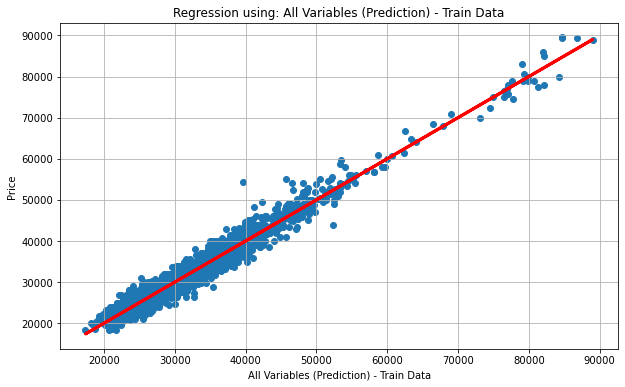

In [38]:
scatters(predicted_st, y_train, predicted_st, 'All Variables (Prediction) - Train Data')

In [39]:
rsq_adj = multi_model_st.rsquared_adj
print('Adj R-Squared: {}'.format(rsq_adj))

Adj R-Squared: 0.9529680071793013


### Test Results

In [40]:
y_predicted_sk = pd.Series(y_predicted_sk)
indexes = []
for i in range(len(y_predicted_sk)):
    if y_predicted_sk[i] > 200000 or y_predicted_sk[i] < 1000:
        indexes.append(i)
y_predicted_sk = y_predicted_sk.drop(indexes)

y_test = y_test.reset_index()
y_test = y_test.Dealer_Listing_Price
y_test = y_test.drop(indexes)

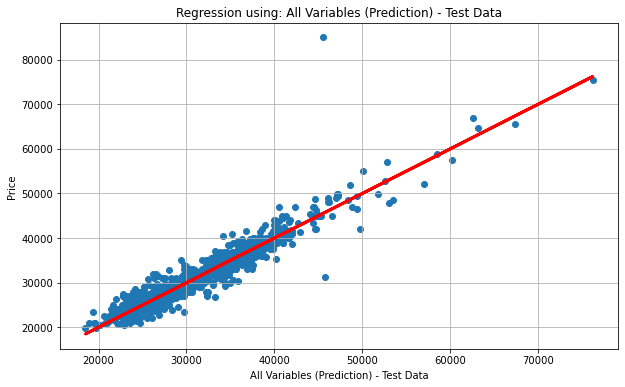

In [41]:
scatters(y_predicted_sk, y_test, y_predicted_sk, 'All Variables (Prediction) - Test Data')

In [42]:
def rsquared_cal(actual, predicted):
    corr_matrix = np.corrcoef(actual, predicted)
    corr = corr_matrix[0,1]
    R_sq = corr**2
    print('R-Squared for the Data: {}'.format(R_sq))
    
rsquared_cal(y_test, y_predicted_sk)

R-Squared for the Data: 0.8972701433161758


In [43]:
def RMSE_performance(X_train, X_test, rm):
    # Predict
    y_predicted_train = rm.predict(X_train)
    y_predicted_test = rm.predict(X_test)

    MSE_train = np.sum(np.square(y_predicted_train - y_train)) / y_train.size
    MSE_test = np.sum(np.square(y_predicted_test - y_test)) / y_test.size

    RMSE_train = math.sqrt(MSE_train)
    RMSE_test = math.sqrt(MSE_test)
    
    return (RMSE_train, RMSE_test)

In [44]:
from sklearn.linear_model import ElasticNet

#Fit a linear regression model to this data
lasso = ElasticNet(alpha = 0.001, max_iter=10000)

# Fit the data(train the model)
lasso.fit(X_train, y_train)

# Predict
y_predicted_train_lasso = lasso.predict(X_train)
y_predicted_test_lasso = lasso.predict(X_test)

y_predicted_test_lasso = pd.Series(y_predicted_test_lasso)
y_predicted_test_lasso = y_predicted_test_lasso.drop(indexes)

rsquared_cal(y_train, y_predicted_train_lasso)
rsquared_cal(y_test, y_predicted_test_lasso)

R-Squared for the Data: 0.9439408781916608
R-Squared for the Data: 0.8975185205309233


### General Structure:

- **Clean the Data:**
    - Missing values: Remove or replace (for median or mode)
    - Split the columns
    - One hot encoding


- **Split into training and validation:**


- **Feature Selection:**
    - Feature selection for 2 models
    - Select the most important variables


- **Select different models and do Cross Validation to select the right hyper parameters:**
    - For 2 models for 2 predictions


- **From there select the best model and get the final model:**
    - For 2 models
  
  
- **Do a final Test Prediction:**
    - For 2 models